In [54]:
import pandas
import statistics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as pl
from sklearn.model_selection import train_test_split

% matplotlib inline
% config InlineBackend.figure_format = "svg"

In [2]:
import pandas as pd

In [3]:
from matplotlib import pyplot as plt

In [4]:
vehiculos = pd.read_csv("datos.csv")

In [5]:
autos = pd.Series(vehiculos.Automoviles).str.replace(",","").astype(int)#estaban en string y los cambia a int
autos

0      202910
1      218395
2      255167
3      284383
4      318898
5      331669
6      343961
7      358600
8      375829
9      400895
10     426235
11     468857
12     491922
13     596290
14     638157
15     608765
16     570580
17     641904
18     659648
19     652389
20     730603
21     783455
22     946458
23    1014350
24    1081386
25    1148872
26    1266511
27    1383889
28    1508483
29    1554138
30    1615356
31    1680336
32    1701489
33    1721050
34    1814989
35    1908689
36    2012979
37    2115230
Name: Automoviles, dtype: int64

In [6]:
vehiculos

,Year,Total,Automoviles,Camiones para pasajeros,Camiones y camionetas para carga,Motocicletas,Unnamed: 6
0,1980,"347,483","202,910","4,402","114,260","25,911",NaN
1,1981,"386,231","218,395","4,807","128,636","34,393",NaN
2,1982,"404,645","255,167","5,043","126,684","17,751",NaN
3,1983,"438,343","284,383","5,348","135,724","12,888",NaN
4,1984,"487,847","318,898","5,955","151,333","11,661",NaN
5,1985,"508,494","331,669","6,167","158,377","12,281",NaN
6,1986,"530,801","343,961","6,358","167,096","13,386",NaN
7,1987,"555,905","358,600","6,542","177,069","13,694",NaN
8,1988,"586,990","375,829","6,536","190,691","13,934",NaN
9,1989,"627,739","400,895","6,823","205,688","14,333",NaN


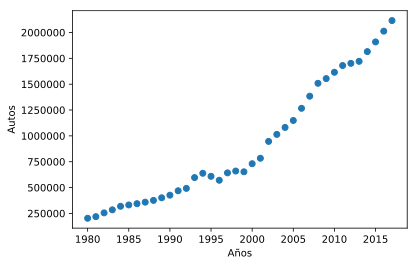

In [7]:
plt.plot(vehiculos.Year, autos, "o" )
plt.xlabel("Años")
plt.ylabel("Autos")
plt.show()

In [8]:
autos.mean() #Promedio de autos por año

916676.7631578947

In [9]:
autos_lista = [] #agrega los datos de lo carros a una lista
for i in autos:
    autos_lista.append(i)
print(autos_lista)

[202910, 218395, 255167, 284383, 318898, 331669, 343961, 358600, 375829, 400895, 426235, 468857, 491922, 596290, 638157, 608765, 570580, 641904, 659648, 652389, 730603, 783455, 946458, 1014350, 1081386, 1148872, 1266511, 1383889, 1508483, 1554138, 1615356, 1680336, 1701489, 1721050, 1814989, 1908689, 2012979, 2115230]


In [10]:
aumento_por_año = [] #Resta de aumento de carros por año
for i in range(len(autos_lista)-1):
    aumento_por_año.append(autos_lista[i+1] - autos_lista[i])
print(aumento_por_año)

[15485, 36772, 29216, 34515, 12771, 12292, 14639, 17229, 25066, 25340, 42622, 23065, 104368, 41867, -29392, -38185, 71324, 17744, -7259, 78214, 52852, 163003, 67892, 67036, 67486, 117639, 117378, 124594, 45655, 61218, 64980, 21153, 19561, 93939, 93700, 104290, 102251]


In [11]:
print(sum(aumento_por_año)/len(aumento_por_año)) #Promedio de aumento por año

51684.32432432433


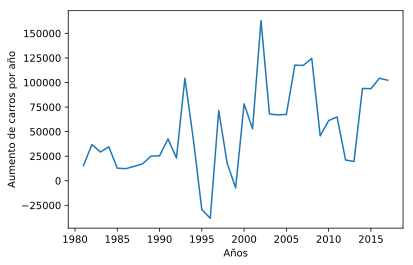

In [12]:
plt.plot(vehiculos.Year[1:], aumento_por_año)
plt.xlabel("Años")
plt.ylabel("Aumento de carros por año")
plt.show()

In [13]:
año = pd.Series(vehiculos.Year).astype(int)#estaban en string y los cambia a int
año

0     1980
1     1981
2     1982
3     1983
4     1984
5     1985
6     1986
7     1987
8     1988
9     1989
10    1990
11    1991
12    1992
13    1993
14    1994
15    1995
16    1996
17    1997
18    1998
19    1999
20    2000
21    2001
22    2002
23    2003
24    2004
25    2005
26    2006
27    2007
28    2008
29    2009
30    2010
31    2011
32    2012
33    2013
34    2014
35    2015
36    2016
37    2017
Name: Year, dtype: int64

In [14]:
año_lista = [] #agrega los datos de lo años a una lista
for i in año:
    año_lista.append(i)
print(año_lista)


[1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]


In [15]:
n = len(autos_lista)
z = len(año_lista)
autos_lista = np.array(autos_lista)
año_lista = np.array(año_lista)
año_lista

array([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017])

In [16]:
sumautos = sum(autos_lista) #x
sumaaño = sum(año_lista)#y
sumaautos2 = sum(autos_lista*autos_lista)
sumaaño2 = sum(año_lista*año_lista)
sumautosaños = sum(autos_lista*año_lista)
promautos = sumautos/n 
promaños = sumaaño/z

In [17]:
m = (sumautos*sumaaño - n*sumautosaños)/(sumautos**2 - n*sumaautos2)
b = promaños - m*promautos
m, b

(1.8146606710179548e-05, 1981.8654272986132)

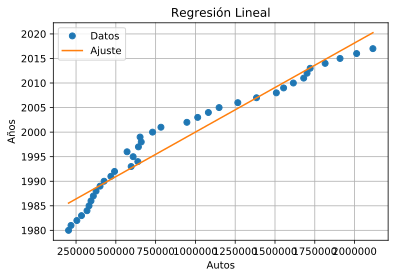

In [18]:
plt.plot(autos_lista,año_lista, "o",label = "Datos")
plt.plot(autos_lista, m*autos_lista + b, label = "Ajuste")
plt.xlabel("Autos")
plt.ylabel("Años")
plt.title("Regresión Lineal")
plt.grid()
plt.legend()
plt.show()

In [20]:
mean_squared_error(m*autos_lista, año_lista)

3927798.4737963914

In [61]:
model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear', LinearRegression(fit_intercept=False))])

In [68]:
modelx = model.fit(autos_lista[:, np.newaxis], año_lista)
modely = model.fit(año_lista[:, np.newaxis], año_lista)

In [69]:
modelx.named_steps['linear'].coef_

array([ 1.50116510e-03,  9.99997750e-01,  1.12535963e-09, -1.87710161e-13])

In [24]:
plt.plot(autos_lista,año_lista,'o', model, y_new)
pylab.title('Polynomial Fit with Matplotlib')
ax = plt.gca()
ax.set_axis_bgcolor((0.898, 0.898, 0.898))
fig = plt.gcf()
py.plot_mpl(fig, filename='polynomial-Fit-with-matplotlib')

NameError: name 'model' is not defined

In [55]:
año_lista = año_lista.reshape(-1, 1)

In [56]:
Xtrain, Xtest, ytrain, ytest = train_test_split(año_lista, autos_lista, test_size=0.4, random_state=42)

In [57]:
regr_1 = DecisionTreeRegressor(max_depth=5)

In [51]:
regr_1.fit(Xtrain, autos_lista)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [52]:
y_1 = regr_1.predict(.reshape(-1, 1))

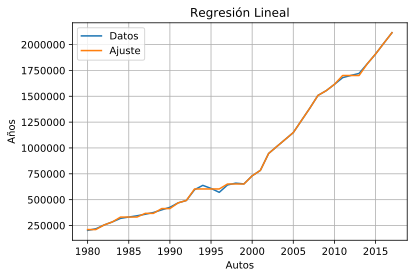

In [53]:
plt.plot(año_lista, autos_lista,label = "Datos")
plt.plot(año_lista, y_1, label = "Ajuste")
plt.xlabel("Autos")
plt.ylabel("Años")
plt.title("Regresión Lineal")
plt.grid()
plt.legend()
plt.show()